<a href="https://colab.research.google.com/github/shambhavi1708/disease-detection-system/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [28]:
df = pd.read_csv('/content/diabetes.csv')

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
df.shape

(768, 9)

In [31]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [32]:
df.fillna(df.median(), inplace=True)

In [33]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [34]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=0)
log_reg = LogisticRegression(max_iter=500, random_state=0)

In [36]:
rf.fit(x_train, y_train)
svm_model.fit(x_train, y_train)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=500, random_state=0)

In [37]:
rf_pred = rf.predict(x_test)
svm_pred = svm_model.predict(x_test)
log_reg_pred = log_reg.predict(x_test)

In [38]:
rf_accuracy = accuracy_score(y_test, rf_pred) * 100
svm_accuracy = accuracy_score(y_test, svm_pred) * 100
log_reg_accuracy = accuracy_score(y_test, log_reg_pred) * 100


In [39]:
print("\nModel Accuracy Scores:")
print(f"- Random Forest Accuracy: {rf_accuracy:.2f}%")
print(f"- SVM Accuracy: {svm_accuracy:.2f}%")
print(f"- Logistic Regression Accuracy: {log_reg_accuracy:.2f}%")



Model Accuracy Scores:
- Random Forest Accuracy: 78.57%
- SVM Accuracy: 79.22%
- Logistic Regression Accuracy: 82.47%


<ipython-input-40-01ce099c7bff>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette='viridis')


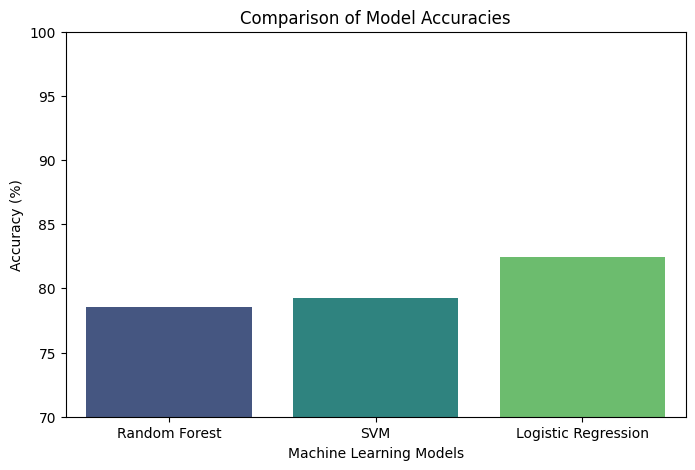

In [40]:
# Visualizing Model Performance (Bar Chart)
models = ['Random Forest', 'SVM', 'Logistic Regression']
accuracy_scores = [rf_accuracy, svm_accuracy, log_reg_accuracy]
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Accuracies")
plt.ylim(70, 100)  # Adjust the Y-axis range
plt.show()

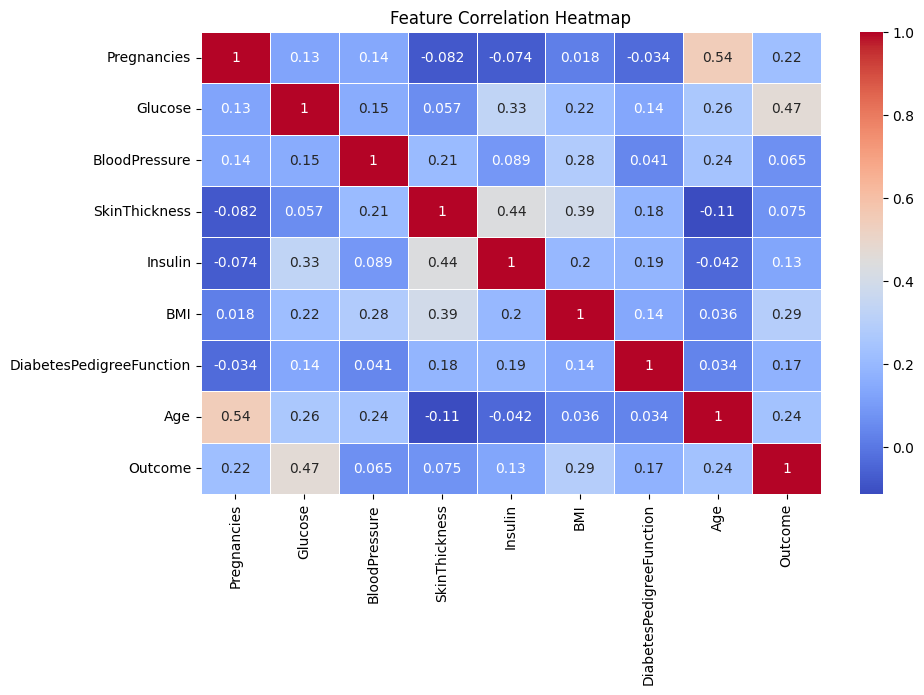

In [41]:
# 1. Feature Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

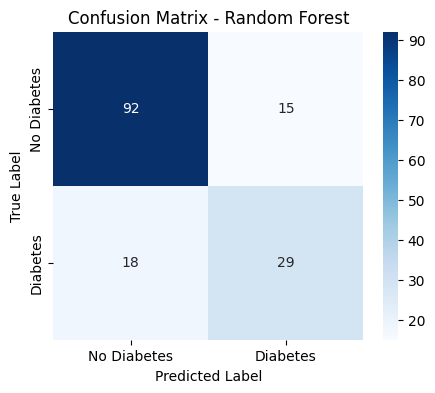

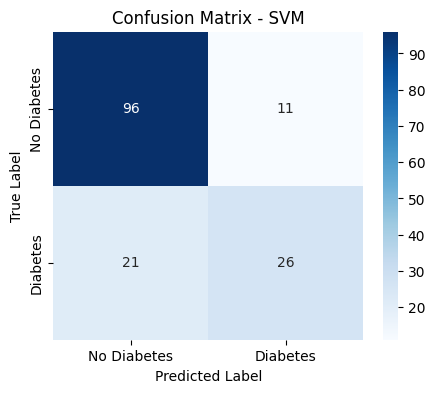

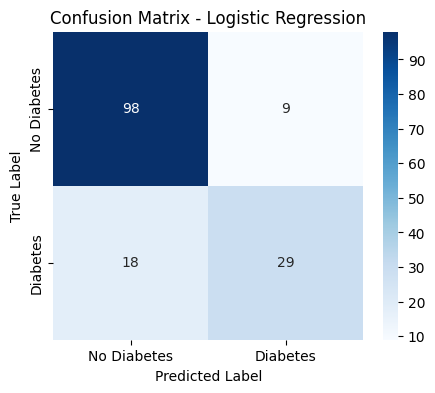

In [42]:
# 2. Confusion Matrices for Each Model
models_dict = {"Random Forest": rf, "SVM": svm_model, "Logistic Regression": log_reg}

for model_name, model in models_dict.items():
    cm = confusion_matrix(y_test, model.predict(x_test))
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

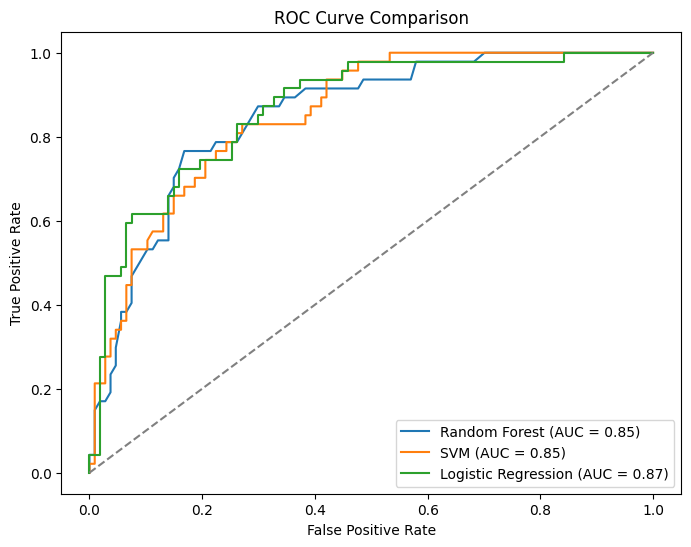

In [43]:
# 3. ROC Curves for Each Model
plt.figure(figsize=(8, 6))
for model_name, model in models_dict.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()